In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Step 1: Load the Image
# Load the input image
image = cv2.imread(r"C:\Users\acer\Downloads\leaf_image.jpeg")  # Replace with your image file
if image is None:
    raise FileNotFoundError("Image file not found. Ensure the file path is correct.")

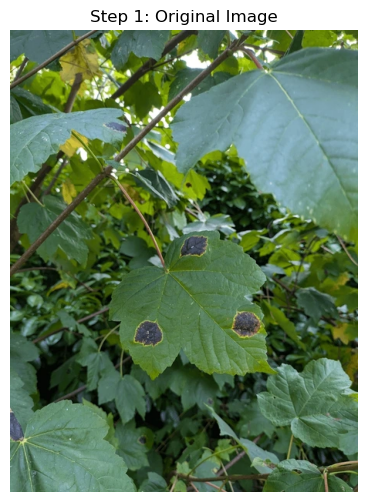

In [24]:
# Display Original Image
plt.figure(figsize=(6, 6))
plt.title("Step 1: Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

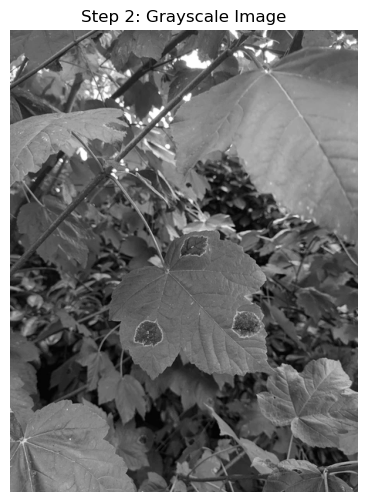

In [25]:
# Step 2: Edge Detection
# Convert to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.title("Step 2: Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

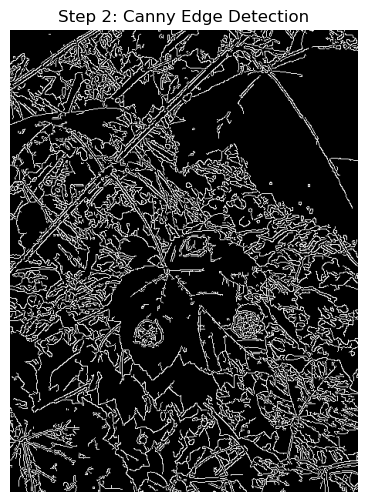

In [26]:
# Use Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)
plt.figure(figsize=(6, 6))
plt.title("Step 2: Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [27]:
# Step 3: Find and Extract the Largest Contour (Single Leaf)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
leaf_contour = contours[0] if contours else None

In [28]:
# Create a mask for the largest contour
mask = np.zeros_like(gray)
if leaf_contour is not None:
    cv2.drawContours(mask, [leaf_contour], -1, 255, thickness=cv2.FILLED)

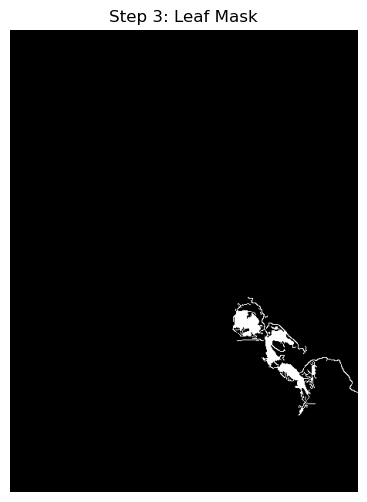

In [29]:
    # Display the Mask of the Leaf
plt.figure(figsize=(6, 6))
plt.title("Step 3: Leaf Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
    # Extract the leaf using the mask
leaf_only = cv2.bitwise_and(image, image, mask=mask)


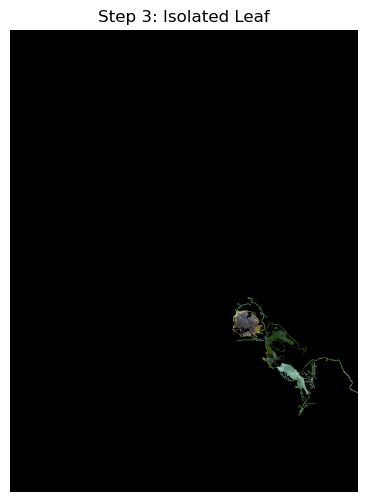

In [31]:
 # Display the Isolated Leaf
plt.figure(figsize=(6, 6))
plt.title("Step 3: Isolated Leaf")
plt.imshow(cv2.cvtColor(leaf_only, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
# Step 4: Blur the Background
blurred_image = cv2.GaussianBlur(image, (25, 25), 0)
blurred_background = cv2.bitwise_and(blurred_image, blurred_image, mask=cv2.bitwise_not(mask))

In [33]:
# Step 5: Combine Blurred Background and Original Clear Leaf
clear_leaf = cv2.bitwise_and(image, image, mask=mask)
output_image = cv2.add(blurred_background, clear_leaf)


In [18]:
    # Step 5: Combine Blurred Background and Original Sharp Leaf
output_image = cv2.add(blurred_background, leaf_only)

In [34]:
# Step 6: Add Padding around the Final Output
padding_size = 50  # Define padding in pixels
padded_output = cv2.copyMakeBorder(
        output_image,
        top=padding_size,
        bottom=padding_size,
        left=padding_size,
        right=padding_size,
        borderType=cv2.BORDER_CONSTANT,
        value=(255, 255, 255)  # White padding
    )



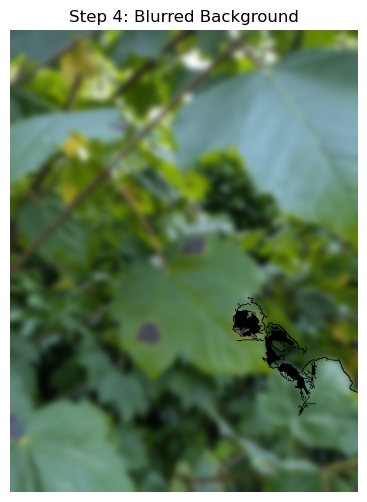

In [35]:
 # Display the Blurred Background
plt.figure(figsize=(6, 6))
plt.title("Step 4: Blurred Background")
plt.imshow(cv2.cvtColor(blurred_background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


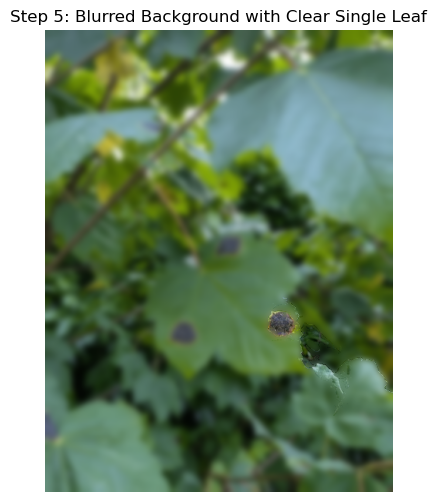

In [36]:
    # Display the Final Result without Padding
plt.figure(figsize=(6, 6))
plt.title("Step 5: Blurred Background with Clear Single Leaf")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

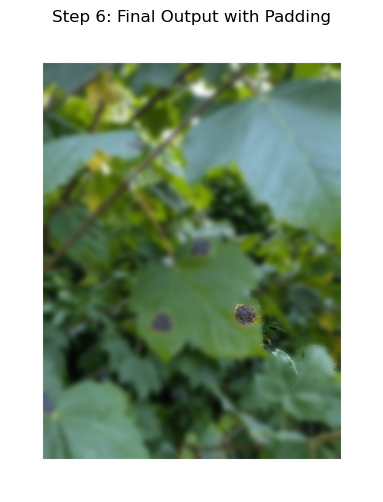

In [37]:
 # Display the Final Result with Padding
plt.figure(figsize=(6, 6))
plt.title("Step 6: Final Output with Padding")
plt.imshow(cv2.cvtColor(padded_output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()